In [1]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# using pandas to read the csv files
df1 = pd.read_csv("https://raw.githubusercontent.com/TGA-Sept-Cohort-Group-A/Reviews-Project/main/Abuja%20Hotels.csv")
df2 = pd.read_csv('https://raw.githubusercontent.com/TGA-Sept-Cohort-Group-A/Reviews-Project/main/Lagos%20Hotels.csv')
df3 = pd.read_csv("https://raw.githubusercontent.com/TGA-Sept-Cohort-Group-A/Reviews-Project/main/Kaduna%20Hotels.csv")

In [3]:
# Renaming the 'Title' column as 'Hotel_Title'
df1 = df1.rename(columns = {'Title':'Hotel_Title','Review':'Review_Text'}, inplace = False)

In [4]:
#Dropping some columns that are irrelevant to the analysis
df2.drop('Number', axis = 1, inplace = True)
df2.drop('Like', axis = 1, inplace = True)
df3.drop('Number_of_Reviews', axis = 1, inplace = True)

In [5]:
df1['State'] = 'Abuja'
df2['State'] = 'Lagos'
df3['State'] = 'Kaduna'

In [6]:
#combine all files in the list
combined_csv = pd.concat([df1,df2,df3])

In [7]:
combined_csv

,Hotel_Title,Title_URL,Address,Address_URL,City,Review_Text,Price,Rating,State
0,Grand Ibro Hotel,https://hotels.ng/hotel/34353-grand-ibro-hotel...,"Wuse, Abuja - 2121 Micheal Okpara Road Opposit...",https://hotels.ng/hotels-in-abuja/wuse,Wuse,"Good stay, my stay was very fine....","₦13,000\n ...",7.4 Very Good,Abuja
1,Power Mike Hotels,https://hotels.ng/hotel/995346-power-mike-hote...,"Garki, Abuja - 9 Argungu Close , Off Benue Cre...",https://hotels.ng/hotels-in-abuja/garki,Garki,The room was reasonably tidy with a very big b...,"₦5,000\n ...",7.3 Very Good,Abuja
2,New Rendezvous Hotel,https://hotels.ng/hotel/36783-new-rendezvous-h...,"Wuse 6, Abuja - 21, Plot 188, Makeni Street, Z...",https://hotels.ng/hotels-in-abuja/wuse-6,Wuse 6,"Very clean room, ventilation was not too good,...","₦5,000\n ...",NaN,Abuja
3,Summit Villas Suites,https://hotels.ng/hotel/37489-summit-villas-su...,"Gwarinpa, Abuja - Life Camp Junction, Opposit...",https://hotels.ng/hotels-in-abuja/gwarinpa,Gwarinpa,The hotel is beautiful and fully equipped. Hos...,"₦8,400\n ...",6.8 Very Good,Abuja
4,Orient Hotel,https://hotels.ng/hotel/32651-orient-hotel-abuja,"Wuse, Abuja - 12 Sudan Street",https://hotels.ng/hotels-in-abuja/wuse,Wuse,My stay was okay at the hotel. There were no i...,"₦9,000\n ...",7.4 Very Good,Abuja
5,Ritman Hotels,https://hotels.ng/hotel/43568-ritman-suites-abuja,"Garki, Abuja - 11 Ilorin Street, Area 8",https://hotels.ng/hotels-in-abuja/garki,Garki,"My stay there was great. Wonderful staff, well...","₦10,000\n ...",7.4 Very Good,Abuja
6,Bolingo Hotel And Towers,https://hotels.ng/hotel/16854-bolingo-hotel-an...,"Central Business District, Abuja - Independent...",https://hotels.ng/hotels-in-abuja/central-busi...,Central Business District,Very comfortable hotel. My stay was good....,"₦18,000\n ...",7.3 Very Good,Abuja
7,Tescon Hotel,https://hotels.ng/hotel/995363-tescon-hotel-abuja,"Lugbe, Abuja - Plot 338 Lugbe Phase 1 Layout, ...",https://hotels.ng/hotels-in-abuja/lugbe,Lugbe,My stay at the hotel was beautiful although th...,"₦6,800\n ...",6.8 Very Good,Abuja
8,AMBIENCE HOTEL ABUJA,https://hotels.ng/hotel/1015140-ambience-hotel...,"Abuja, Abuja - 27 Ontario Cresent, Suncity Es...",https://hotels.ng/hotels-in-abuja/abuja,Abuja,I had a nice stay...,"₦7,000\n ...",7.4 Very Good,Abuja
9,Salaam Hospitality,https://hotels.ng/hotel/1391093-salaam-hospita...,"Gwarinpa, Abuja - No 26 Femi Adetola Street, O...",https://hotels.ng/hotels-in-abuja/gwarinpa,Gwarinpa,NaN,"₦6,000\n ...",NaN,Abuja


In [8]:
# getting an overview of the columns of the dataset
combined_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15259 entries, 0 to 9519
Data columns (total 9 columns):
Hotel_Title    15259 non-null object
Title_URL      15259 non-null object
Address        15259 non-null object
Address_URL    15259 non-null object
City           10897 non-null object
Review_Text    711 non-null object
Price          4337 non-null object
Rating         540 non-null object
State          15259 non-null object
dtypes: object(9)
memory usage: 1.2+ MB


In [9]:
combined_csv.describe()

,Hotel_Title,Title_URL,Address,Address_URL,City,Review_Text,Price,Rating,State
count,15259,15259,15259,15259,10897,711,4337,540,15259
unique,4121,4171,3803,274,348,690,522,20,3
top,"Trophy Hotel, Kaduna",https://hotels.ng/hotel/1398778-nordhaus-hotel,"Zaria, Kaduna - Kataf, Kakuri, Kaduna",https://hotels.ng/hotels-in-kaduna/,Kaduna,My stay was okay....,"₦15,000\n ...",6.0 Very Good,Kaduna
freq,919,919,919,3680,2893,4,532,44,9520


In [10]:
# changing the string entries for the 'Price' column to numeric values
combined_csv['Price'] = pd.to_numeric(combined_csv.Price.str.replace('[^\d.]', ''), errors='coerce')

In [11]:
# making the same changes to the 'Rating' column
combined_csv['Rating'] = pd.to_numeric(combined_csv.Rating.str.replace('[^\d.]', ''), errors='coerce')

In [12]:
combined_csv

,Hotel_Title,Title_URL,Address,Address_URL,City,Review_Text,Price,Rating,State
0,Grand Ibro Hotel,https://hotels.ng/hotel/34353-grand-ibro-hotel...,"Wuse, Abuja - 2121 Micheal Okpara Road Opposit...",https://hotels.ng/hotels-in-abuja/wuse,Wuse,"Good stay, my stay was very fine....",13000.0,7.4,Abuja
1,Power Mike Hotels,https://hotels.ng/hotel/995346-power-mike-hote...,"Garki, Abuja - 9 Argungu Close , Off Benue Cre...",https://hotels.ng/hotels-in-abuja/garki,Garki,The room was reasonably tidy with a very big b...,5000.0,7.3,Abuja
2,New Rendezvous Hotel,https://hotels.ng/hotel/36783-new-rendezvous-h...,"Wuse 6, Abuja - 21, Plot 188, Makeni Street, Z...",https://hotels.ng/hotels-in-abuja/wuse-6,Wuse 6,"Very clean room, ventilation was not too good,...",5000.0,NaN,Abuja
3,Summit Villas Suites,https://hotels.ng/hotel/37489-summit-villas-su...,"Gwarinpa, Abuja - Life Camp Junction, Opposit...",https://hotels.ng/hotels-in-abuja/gwarinpa,Gwarinpa,The hotel is beautiful and fully equipped. Hos...,8400.0,6.8,Abuja
4,Orient Hotel,https://hotels.ng/hotel/32651-orient-hotel-abuja,"Wuse, Abuja - 12 Sudan Street",https://hotels.ng/hotels-in-abuja/wuse,Wuse,My stay was okay at the hotel. There were no i...,9000.0,7.4,Abuja
5,Ritman Hotels,https://hotels.ng/hotel/43568-ritman-suites-abuja,"Garki, Abuja - 11 Ilorin Street, Area 8",https://hotels.ng/hotels-in-abuja/garki,Garki,"My stay there was great. Wonderful staff, well...",10000.0,7.4,Abuja
6,Bolingo Hotel And Towers,https://hotels.ng/hotel/16854-bolingo-hotel-an...,"Central Business District, Abuja - Independent...",https://hotels.ng/hotels-in-abuja/central-busi...,Central Business District,Very comfortable hotel. My stay was good....,18000.0,7.3,Abuja
7,Tescon Hotel,https://hotels.ng/hotel/995363-tescon-hotel-abuja,"Lugbe, Abuja - Plot 338 Lugbe Phase 1 Layout, ...",https://hotels.ng/hotels-in-abuja/lugbe,Lugbe,My stay at the hotel was beautiful although th...,6800.0,6.8,Abuja
8,AMBIENCE HOTEL ABUJA,https://hotels.ng/hotel/1015140-ambience-hotel...,"Abuja, Abuja - 27 Ontario Cresent, Suncity Es...",https://hotels.ng/hotels-in-abuja/abuja,Abuja,I had a nice stay...,7000.0,7.4,Abuja
9,Salaam Hospitality,https://hotels.ng/hotel/1391093-salaam-hospita...,"Gwarinpa, Abuja - No 26 Femi Adetola Street, O...",https://hotels.ng/hotels-in-abuja/gwarinpa,Gwarinpa,NaN,6000.0,NaN,Abuja


In [13]:
# getting the mean of the 'Rating' column and rounding it off to one decimal point
mean_price = round(combined_csv['Rating'].mean(),1)

In [14]:
mean_price 

7.0

In [15]:
# filling the NaNs of the 'Rating' column with its mean
combined_csv['Rating'] = combined_csv['Rating'].fillna(mean_price)

In [16]:
# dropping the NaN entries in any row
combined_csv.dropna(how ='any', axis = 0, inplace = True)

In [17]:
combined_csv

,Hotel_Title,Title_URL,Address,Address_URL,City,Review_Text,Price,Rating,State
0,Grand Ibro Hotel,https://hotels.ng/hotel/34353-grand-ibro-hotel...,"Wuse, Abuja - 2121 Micheal Okpara Road Opposit...",https://hotels.ng/hotels-in-abuja/wuse,Wuse,"Good stay, my stay was very fine....",13000.0,7.4,Abuja
1,Power Mike Hotels,https://hotels.ng/hotel/995346-power-mike-hote...,"Garki, Abuja - 9 Argungu Close , Off Benue Cre...",https://hotels.ng/hotels-in-abuja/garki,Garki,The room was reasonably tidy with a very big b...,5000.0,7.3,Abuja
2,New Rendezvous Hotel,https://hotels.ng/hotel/36783-new-rendezvous-h...,"Wuse 6, Abuja - 21, Plot 188, Makeni Street, Z...",https://hotels.ng/hotels-in-abuja/wuse-6,Wuse 6,"Very clean room, ventilation was not too good,...",5000.0,7.0,Abuja
3,Summit Villas Suites,https://hotels.ng/hotel/37489-summit-villas-su...,"Gwarinpa, Abuja - Life Camp Junction, Opposit...",https://hotels.ng/hotels-in-abuja/gwarinpa,Gwarinpa,The hotel is beautiful and fully equipped. Hos...,8400.0,6.8,Abuja
4,Orient Hotel,https://hotels.ng/hotel/32651-orient-hotel-abuja,"Wuse, Abuja - 12 Sudan Street",https://hotels.ng/hotels-in-abuja/wuse,Wuse,My stay was okay at the hotel. There were no i...,9000.0,7.4,Abuja
5,Ritman Hotels,https://hotels.ng/hotel/43568-ritman-suites-abuja,"Garki, Abuja - 11 Ilorin Street, Area 8",https://hotels.ng/hotels-in-abuja/garki,Garki,"My stay there was great. Wonderful staff, well...",10000.0,7.4,Abuja
6,Bolingo Hotel And Towers,https://hotels.ng/hotel/16854-bolingo-hotel-an...,"Central Business District, Abuja - Independent...",https://hotels.ng/hotels-in-abuja/central-busi...,Central Business District,Very comfortable hotel. My stay was good....,18000.0,7.3,Abuja
7,Tescon Hotel,https://hotels.ng/hotel/995363-tescon-hotel-abuja,"Lugbe, Abuja - Plot 338 Lugbe Phase 1 Layout, ...",https://hotels.ng/hotels-in-abuja/lugbe,Lugbe,My stay at the hotel was beautiful although th...,6800.0,6.8,Abuja
8,AMBIENCE HOTEL ABUJA,https://hotels.ng/hotel/1015140-ambience-hotel...,"Abuja, Abuja - 27 Ontario Cresent, Suncity Es...",https://hotels.ng/hotels-in-abuja/abuja,Abuja,I had a nice stay...,7000.0,7.4,Abuja
10,Ritman Hotels Gwarinpa Branch,https://hotels.ng/hotel/51449-ritman-hotels-gw...,"Gwarinpa, Abuja - 5 Christina Ajayi Okunuga St...",https://hotels.ng/hotels-in-abuja/gwarinpa,Gwarinpa,The hotel is a nice place to be. I enjoyed mys...,10500.0,6.5,Abuja


In [18]:
# saving the cleaned dataset as a csv file
combined_csv.to_csv('Hotels Combined.csv')

In [19]:
# # in_cities = dataset.groupby(['Hotel_Title', 'City'])
# combined_csv['City'].value_counts().plot.bar()

In [20]:
#using the Groupby Function to aggregate the City and Hotel_Title columns
hotels_in_cities = combined_csv.groupby(['City' ,'Hotel_Title'])

In [21]:
hotels_in_cities.first()

Title_URL  \
City             Hotel_Title                                                                                
  Festac         Golden King (GKA) Festac               https://hotels.ng/hotel/1392062-golden-king-gk...   
 Kubwa           Arlington Hotels                       https://hotels.ng/hotel/72822-arlington-hotels...   
 Kuje            Deroma Hotels                          https://hotels.ng/hotel/995411-deroma-hotels-s...   
 Lugbe           Blue-view Hotel                        https://hotels.ng/hotel/1013093-blue-view-hote...   
 Surulere,Lagos  BENESTAR SUITES                        https://hotels.ng/hotel/88812-benestar-suites-...   
 Victoria Island Integrity Hotel And Suites             https://hotels.ng/hotel/1012440-integrity-hote...   
AMAC             Grand Pela Hotel And Suites            https://hotels.ng/hotel/1013084-grand-pela-hot...   
Abuja            AMBIENCE HOTEL ABUJA                   https://hotels.ng/hotel/1015140-ambience-hotel...   
                 Bel Classcia (Former Durban Suites)    https://hotels.ng/hotel/1012461-durban-suites-...   
                 Paris Le Lodge                         https://hotels.ng/hotel/1012695-paris-le-lodge...   
                 Sinclair Guest House                   https://hotels.ng/hotel/1012666-sinclair-guest...   
                 Top Rank Hotels Galaxy, Abuja          https://hotels.ng/hotel/1007668-top-rank-hotel...   
Abule Egba       TopFlight Royale Hotel                 https://hotels.ng/hotel/48184-top-flight-royal...   
Agbara           De Oasis By Glinses Suites             https://hotels.ng/hotel/14611-de-oasis-byglins...   
Agege            Kia And Testimony Hotel                https://hotels.ng/hotel/87897-kia-testimony-ho...   
Ajah             Ajaxbel Hotel                          https://hotels.ng/hotel/37612-ajaxbel-hotel-lagos   
                 Alesh International Hotel              https://hotels.ng/hotel/29319-alesh-internatio...   
                 Amador Suites                          https://hotels.ng/hotel/35955-amador-suites-lagos   
                 Atican Beach Resort Hotel              https://hotels.ng/hotel/96863-atican-beach-res...   
                 D'Island Hotel                             https://hotels.ng/hotel/1392911-disland-hotel   
                 Fairmont Suites By Virgin Hospitality  https://hotels.ng/hotel/65629-fairmont-suites-...   
                 Global Inn And Resort                  https://hotels.ng/hotel/85562-global-inn-resor...   
                 Lavalon Hotels And Suites              https://hotels.ng/hotel/18813-lavalon-hotels-a...   
                 Le Brigadier Hotel                     https://hotels.ng/hotel/1006712-le-brigadier-h...   
                 Lobim D' Hotel                         https://hotels.ng/hotel/13963-lobim-d-hotel-lagos   
                 Milestone Hotel                        https://hotels.ng/hotel/24482-milestone-hotel-...   
Ajao Estate      Coronia Hotel                          https://hotels.ng/hotel/67668-coronia-hotel-aj...   
                 Cynarisso Hotel Limited.               https://hotels.ng/hotel/18569-cynarisso-hotel-...   
                 D'luxx Villa And Suites                https://hotels.ng/hotel/1391736-dluxx-villa-an...   
                 De Next Centre Resorts Limited         https://hotels.ng/hotel/14823-de-next-centre-r...   
...                                                                                                   ...   
Wuye             New City Hotel                              https://hotels.ng/hotel/52494-new-city-abuja   
                 Peace Haven Hotel                      https://hotels.ng/hotel/82713-peace-haven-hote...   
Yaba             Academy Hotel Limited                  https://hotels.ng/hotel/35917-yct-royal-guest-...   
                 Banilux Guest House                    https://hotels.ng/hotel/1007405-banilux-hotel-...   
                 De-Next Hotel                          https:/

In [22]:
#using the Groupby Function to aggregate the price and Hotel_Title columns
price_per_city = combined_csv.groupby(['Price','Hotel_Title'])

In [23]:
price_per_city.first()

Title_URL  \
Price    Hotel_Title                                                                                             
1900.0   Zino Hotel International                            https://hotels.ng/hotel/49658-zino-hotel-inter...   
2000.0   Ajaxbel Hotel                                       https://hotels.ng/hotel/37612-ajaxbel-hotel-lagos   
2200.0   Elegant Guest Inn                                   https://hotels.ng/hotel/92434-elegant-guest-in...   
2300.0   Rex Guest Inn                                       https://hotels.ng/hotel/999427-rex-guest-inn-k...   
2500.0   K Royal Hotel                                       https://hotels.ng/hotel/18988-k-royal-hotel-lagos   
         Mobech Guest House Restaurant                       https://hotels.ng/hotel/27174-mobech-guest-hou...   
3000.0   Alomars Lodge                                       https://hotels.ng/hotel/33626-alomars-lodge-lagos   
         Aso-Rock Hotel                                      https://hotels.ng/hotel/25889-aso-rock-hotel-l...   
         Demrose Hotel                                       https://hotels.ng/hotel/76829-demrose-hotel-lagos   
         Ovation Executive Hotel                             https://hotels.ng/hotel/92616-ovation-executiv...   
3150.0   Unilag Guest House                                  https://hotels.ng/hotel/62224-unilag-guest-hou...   
3300.0   Motun International Hotel Limited                   https://hotels.ng/hotel/14464-motun-internatio...   
3500.0   Ced Lodge                                             https://hotels.ng/hotel/1009578-ced-lodge-lagos   
         Jyrox Royal Hotel                                   https://hotels.ng/hotel/1004802-jyrox-royall-h...   
         Sikky Rolex Hotel                                   https://hotels.ng/hotel/26179-sikky-rolex-hote...   
3800.0   De Bluezzz, Bariga                                  https://hotels.ng/hotel/1006334-de-bluezzz-bar...   
4000.0   Bakky Fasal Guest House                             https://hotels.ng/hotel/1002408-bakky-fasal-ho...   
         Famoss Guest House                                  https://hotels.ng/hotel/23237-famoss-guest-hou...   
         Hotel C And M                                       https://hotels.ng/hotel/998636-hotel-c-and-m-l...   
         House U Hotel MM                                    https://hotels.ng/hotel/57848-house-u-hotel-lagos   
         Ignobis Hotel                                       https://hotels.ng/hotel/23282-ignobis-hotel-abuja   
         Ojei Golden Gate Hotel And Suite                    https://hotels.ng/hotel/43675-ojei-golden-gate...   
         Paradise Hotel And Garden                           https://hotels.ng/hotel/98641-holy-wood-hotel-...   
         Pedallo Luxury Inn                                  https://hotels.ng/hotel/58328-pedallo-luxury-i...   
         Queenset Guest House                                https://hotels.ng/hotel/87773-queenset-guest-h...   
4150.0   Tomaso King Palace 3                                https://hotels.ng/hotel/1008580-tomaso-king-pa...   
4275.0   Medallion Royal Suites                              https://hotels.ng/hotel/21551-medallion-royal-...   
4500.0   Becfom Hotels                                       https://hotels.ng/hotel/93586-becfom-hotels-lagos   
         Cupid Suites Restaurant                             https://hotels.ng/hotel/93443-cupid-suite-rest...   
         Mozzarella Hotels                                   https://hotels.ng/hotel/1005579-mozzarella-hot...   
...                                                                                                        ...   
50000.0  The Lilygate Lagos                                  https://hotels.ng/hotel/997926-the-lilygate-la...   
51200.0  Protea Hotel Kuramo Waters                          https://hotels.ng/hotel/56262-protea-hotel-kur...   
51450.0  BON Hotel Elvis                                       https://hotels.ng/hotel/1392627-bon-hotel-elvis 

In [24]:
combined_csv['Cleaned'] = combined_csv["Review_Text"].apply(lambda x: x.lower())

In [25]:
import string
import re

In [26]:
# removing punctuations
combined_csv['Cleaned'] = combined_csv['Cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [27]:
# removing the spaces caused by the removal of punctations
combined_csv['Cleaned']=combined_csv['Cleaned'].apply(lambda x: re.sub(' +',' ',x))

In [28]:
for index,text in enumerate(combined_csv['Cleaned'][35:40]):
    print('Review %d:\n'%(index+1),text)

Review 1:
 i enjoyed my stay the reception was good and the staff was very helpful the environment 
Review 2:
 it was a good stay service was perfect
Review 3:
 the hotel has about everything going for it the location is serene and amenities are top 
Review 4:
 my stay was fantastic
Review 5:
 i quite enjoyed my stay at the hotel i did not exactly have any issues checking in and ou


In [29]:
# !pip install wordcloud

In [30]:
from wordcloud import WordCloud, STOPWORDS

In [31]:
# !pip install spacy
# !python -m spacy download en_core_web_sm    #downloading the spacy language model

In [32]:
#Importing the Spacy NLP library 
import spacy

In [33]:
#loading the core english language model to the library
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

In [34]:
#Lemmatization converts words in the second or third forms to their first form variants
combined_csv['lemmatized']=combined_csv['Cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [35]:
dataset_grouped=combined_csv[['Hotel_Title','lemmatized']].groupby(by='Hotel_Title').agg(lambda x:' '.join(x))
dataset_grouped.head()

,lemmatized
Hotel_Title,
"COMMAND GUEST HOUSE, KADUNA",stay wonderful hotel appreciate prompt service...
Hawthorn Suites By Wyndham,good stay hotel environment nice cool good ambia
Hotel 1960 (Prince Of Anthony),stay weekend hotel wonderful welcome cheerfull...
Hotel Rosebud,patronize hotel close year disap
Le Patriarche Lodge,stay hotel wonderful reception welcome room cl...


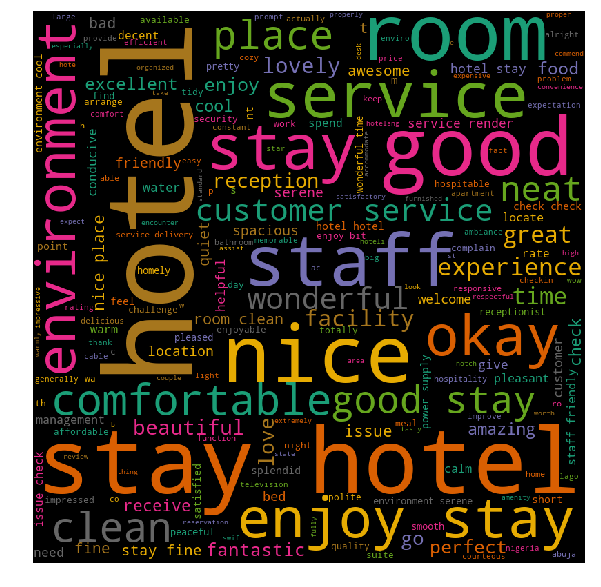

In [36]:
wordcloud = WordCloud(width = 800, height = 800, 
                colormap="Dark2",  
                min_font_size = 10).generate(' '.join(combined_csv['lemmatized'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

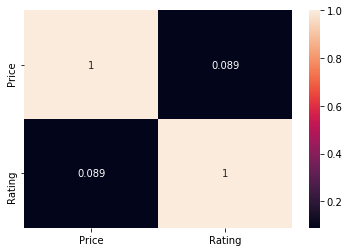

In [37]:
#visualising the price vs Rating on a heatmap
correl = combined_csv[['Price','Rating']]
correl.corr()
sns.heatmap(correl.corr(), annot = True)

In [38]:
combined_csv.head()

,Hotel_Title,Title_URL,Address,Address_URL,City,Review_Text,Price,Rating,State,Cleaned,lemmatized
0,Grand Ibro Hotel,https://hotels.ng/hotel/34353-grand-ibro-hotel...,"Wuse, Abuja - 2121 Micheal Okpara Road Opposit...",https://hotels.ng/hotels-in-abuja/wuse,Wuse,"Good stay, my stay was very fine....",13000.0,7.4,Abuja,good stay my stay was very fine,good stay stay fine
1,Power Mike Hotels,https://hotels.ng/hotel/995346-power-mike-hote...,"Garki, Abuja - 9 Argungu Close , Off Benue Cre...",https://hotels.ng/hotels-in-abuja/garki,Garki,The room was reasonably tidy with a very big b...,5000.0,7.3,Abuja,the room was reasonably tidy with a very big b...,room reasonably tidy big bed sleep comfortably...
2,New Rendezvous Hotel,https://hotels.ng/hotel/36783-new-rendezvous-h...,"Wuse 6, Abuja - 21, Plot 188, Makeni Street, Z...",https://hotels.ng/hotels-in-abuja/wuse-6,Wuse 6,"Very clean room, ventilation was not too good,...",5000.0,7.0,Abuja,very clean room ventilation was not too good n...,clean room ventilation good ensuite facility c...
3,Summit Villas Suites,https://hotels.ng/hotel/37489-summit-villas-su...,"Gwarinpa, Abuja - Life Camp Junction, Opposit...",https://hotels.ng/hotels-in-abuja/gwarinpa,Gwarinpa,The hotel is beautiful and fully equipped. Hos...,8400.0,6.8,Abuja,the hotel is beautiful and fully equipped hosp...,hotel beautiful fully equip hospitable respons...
4,Orient Hotel,https://hotels.ng/hotel/32651-orient-hotel-abuja,"Wuse, Abuja - 12 Sudan Street",https://hotels.ng/hotels-in-abuja/wuse,Wuse,My stay was okay at the hotel. There were no i...,9000.0,7.4,Abuja,my stay was okay at the hotel there were no is...,stay okay hotel issue stay receive


In [39]:
#counting the occurence of the cities with hotels for the three states
combined_csv['City'].value_counts()

Ikeja                         101
Victoria Island                48
Lekki                          48
Surulere                       28
Wuse                           23
Yaba                           20
Ikoyi                          17
Garki                          17
Ajao Estate                    16
Lekki Phase 1                  16
Festac                         15
Maitama                        14
Gwarinpa                       12
Ajah                           11
Maryland                       11
Utako                           9
Kubwa                           8
Kaduna North                    8
Wuse 2                          8
Jabi                            8
Central Business District       6
Zaria                           6
Magodo                          6
Gbagada                         6
Apapa                           6
Egbeda                          5
Kaduna South                    5
Amuwo-Odofin                    5
Ikorodu                         5
Ikotun        

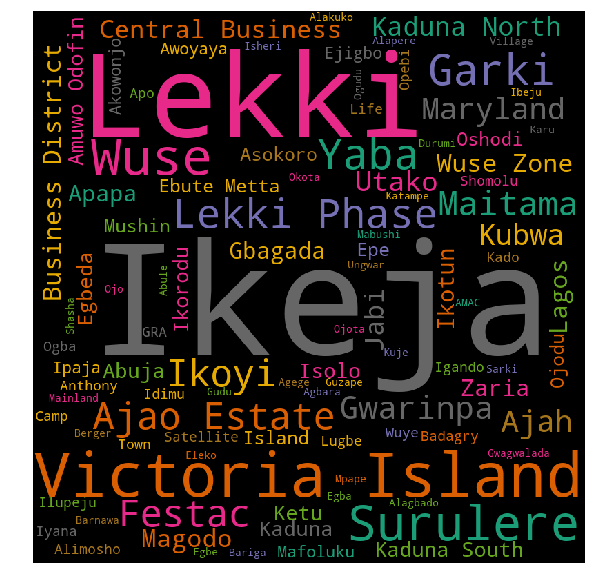

In [49]:
#wordcloud for the cities with hotels in them, using the three cities; Abuja, Lagos,Kaduna
wordcloud = WordCloud(width = 800, height = 800, 
                colormap="Dark2",  
                min_font_size = 10).generate(' '.join(combined_csv['City'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [41]:
#getting a count on the number of times a city appears
State_City = combined_csv.groupby(["State", "City"]).size().reset_index(name="Time")
State_City

,State,City,Time
0,Abuja,Kubwa,1
1,Abuja,Kuje,1
2,Abuja,Lugbe,1
3,Abuja,AMAC,1
4,Abuja,Abuja,5
5,Abuja,Apo,2
6,Abuja,Asokoro,4
7,Abuja,Central Business District,6
8,Abuja,Central Business District,1
9,Abuja,Durumi,1


In [66]:
#aggregating Abuja from the combined_csv for the hotel cities in Abuja
Hotel_Cities_Abuja = combined_csv.loc[combined_csv["State"] == "Abuja"]

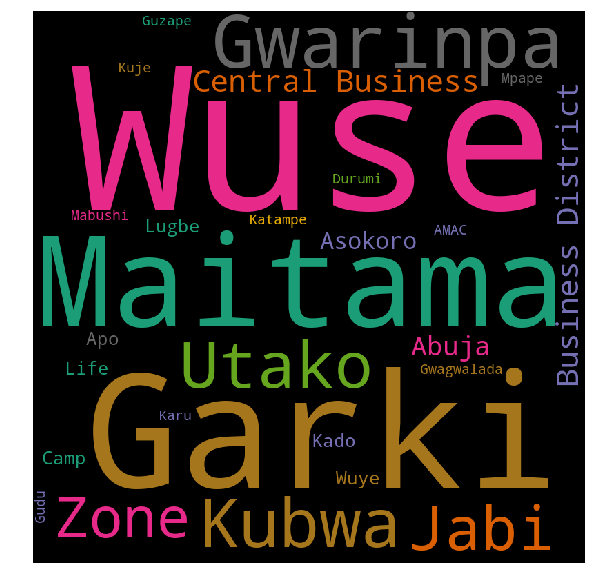

In [67]:
#wordcloud for the cities in Abuja showing the frequency 
wordcloud = WordCloud(width = 800, height = 800, 
                colormap="Dark2",  
                min_font_size = 10).generate(' '.join(Hotel_Cities_Abuja['City'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [69]:
#aggregating from the combined_csv for the hotel cities in Lagos
Hotel_Cities_Lagos = combined_csv.loc[combined_csv["State"] == "Lagos"]

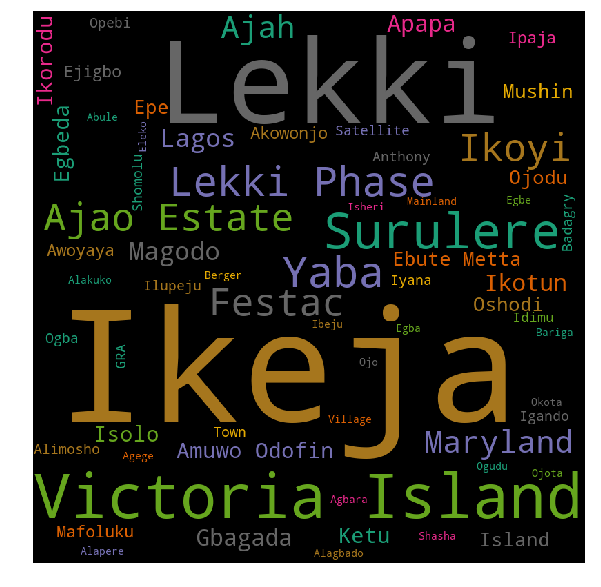

In [70]:
#wordcloud for the cities in Lagos showing the frequency 
wordcloud = WordCloud(width = 800, height = 800, 
                colormap="Dark2",  
                min_font_size = 10).generate(' '.join(Hotel_Cities_Lagos['City'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [72]:
#aggregating from the combined_csv for the hotel cities in Kaduna
Hotel_Cities_Kaduna = combined_csv.loc[combined_csv["State"] == "Kaduna"]

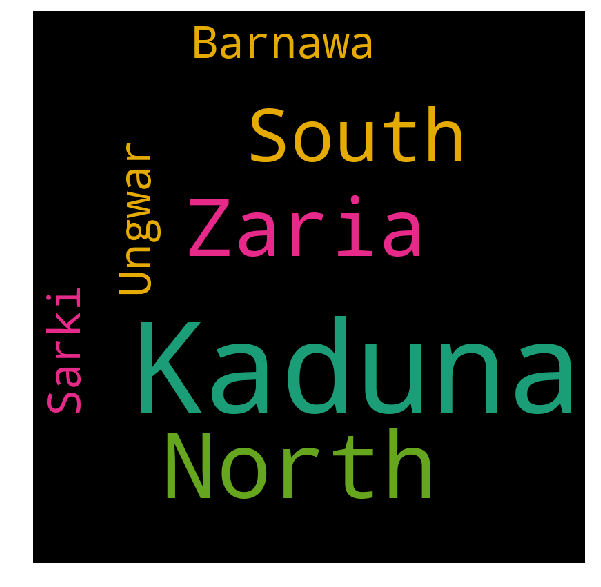

In [73]:
#wordcloud for the cities in Lagos showing the frequency 
wordcloud = WordCloud(width = 800, height = 800, 
                colormap="Dark2",  
                min_font_size = 10).generate(' '.join(Hotel_Cities_Kaduna['City'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()